In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
%matplotlib inline
plt.style.use("seaborn-bright")

In [39]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [41]:
#敘述統計
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


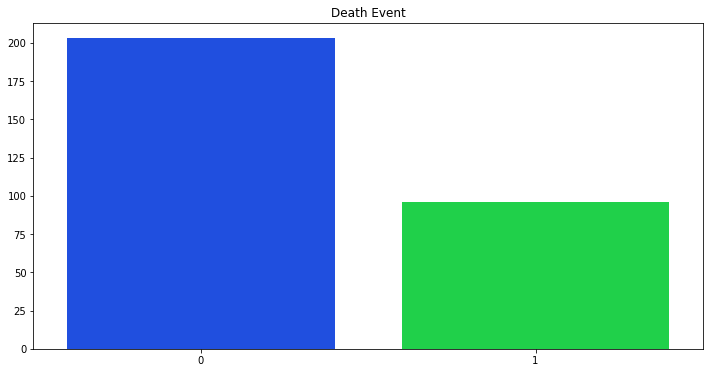

In [42]:
# 分析死亡案件占比 (圖表)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='DEATH_EVENT')
plt.title('Death Event')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [43]:
# 分析死亡案件占比
df.DEATH_EVENT.value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

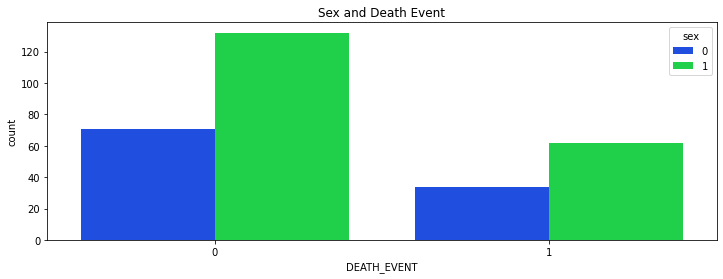

In [44]:
# 分析死亡案件占比 依照性別做區分
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='DEATH_EVENT', hue='sex')
plt.title('Sex and Death Event')
plt.show()

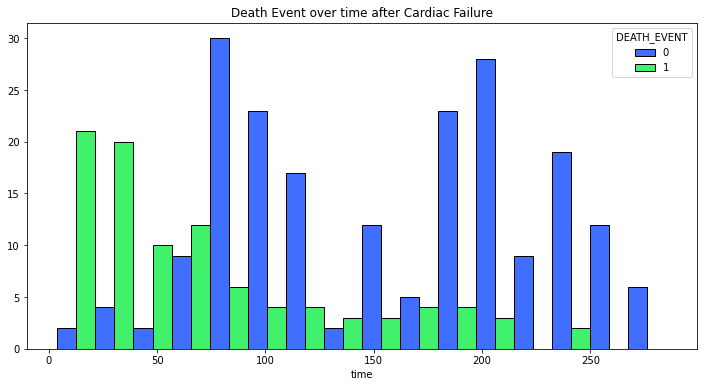

In [45]:
# 分析在心力衰竭後多久會死亡
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='time', hue='DEATH_EVENT', bins=16, multiple='dodge')
plt.title('Death Event over time after Cardiac Failure')
plt.ylabel(None)
plt.show()

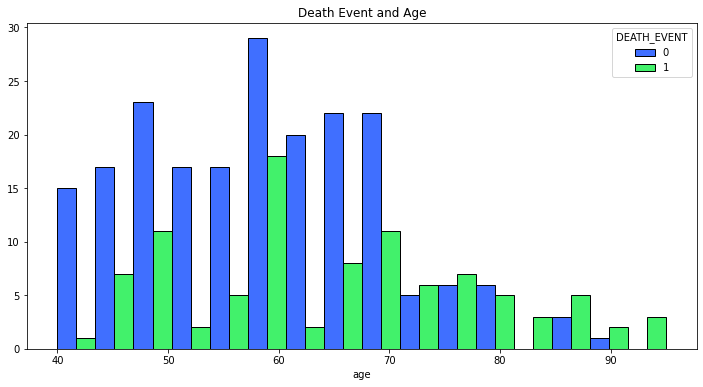

In [46]:
# 分析在死亡數與年齡的分布
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', multiple='dodge', bins=16)
plt.title('Death Event and Age')
plt.ylabel(None)
plt.show()

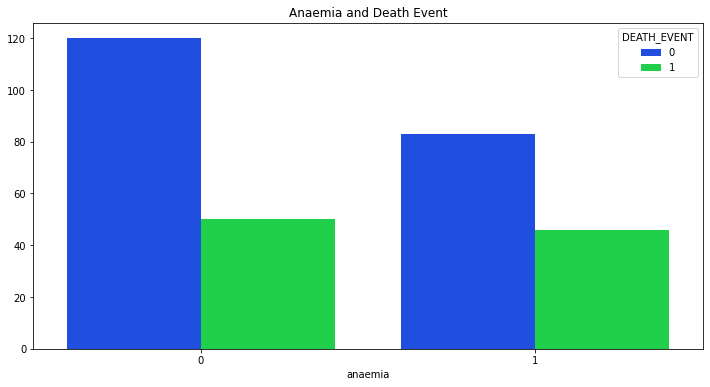

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='anaemia', hue='DEATH_EVENT')
plt.title('Anaemia and Death Event')
plt.ylabel(None)
plt.show()

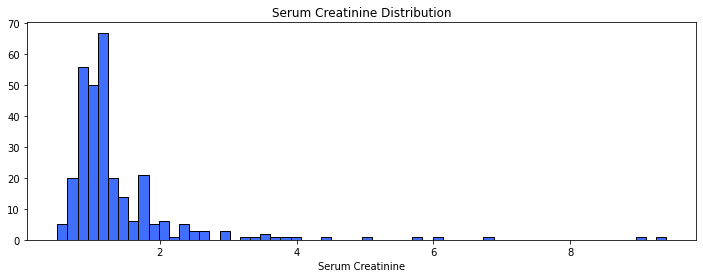

In [48]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='serum_creatinine')
plt.title('Serum Creatinine Distribution')
plt.xlabel('Serum Creatinine')
plt.ylabel(None)
plt.show()

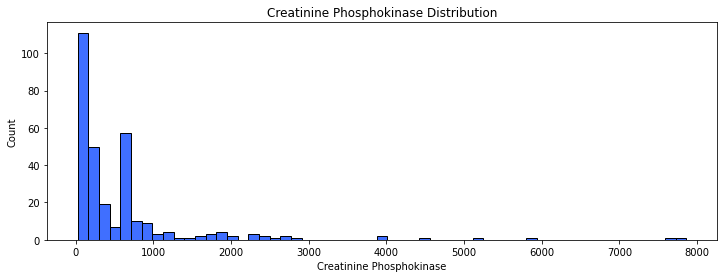

In [49]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='creatinine_phosphokinase')
plt.title('Creatinine Phosphokinase Distribution')
plt.xlabel('Creatinine Phosphokinase')
plt.show()

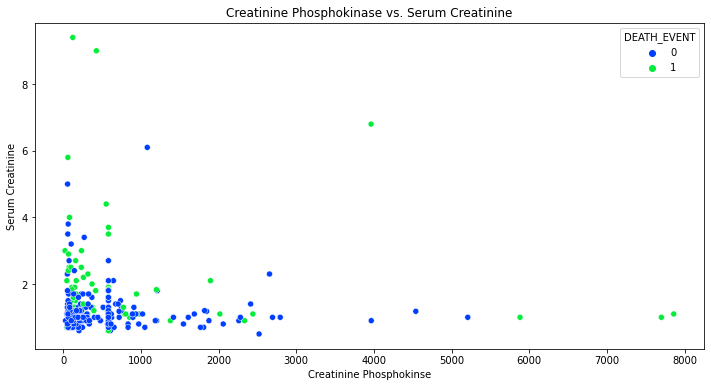

In [50]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='creatinine_phosphokinase', y='serum_creatinine', hue='DEATH_EVENT')
plt.title('Creatinine Phosphokinase vs. Serum Creatinine')
plt.xlabel('Creatinine Phosphokinse')
plt.ylabel('Serum Creatinine')
plt.show()

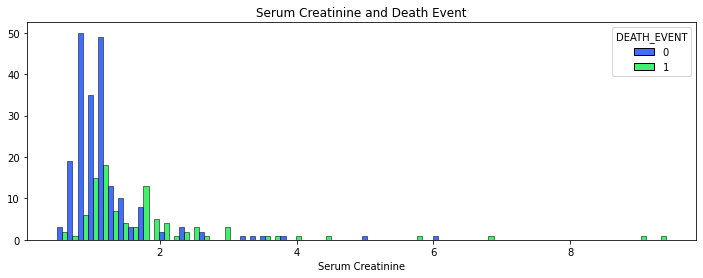

In [51]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='serum_creatinine', hue='DEATH_EVENT', multiple='dodge')
plt.title('Serum Creatinine and Death Event')
plt.ylabel(None)
plt.xlabel('Serum Creatinine')
plt.show()

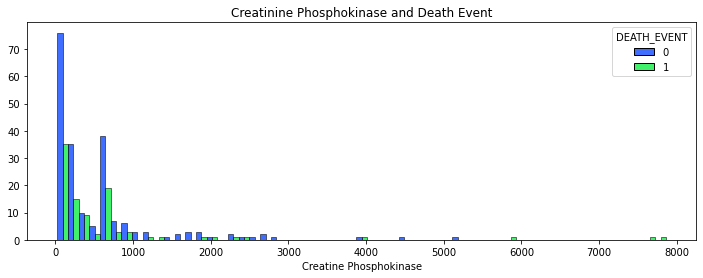

In [52]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='creatinine_phosphokinase', hue='DEATH_EVENT', multiple='dodge')
plt.title('Creatinine Phosphokinase and Death Event')
plt.ylabel(None)
plt.xlabel('Creatine Phosphokinase')
plt.show()

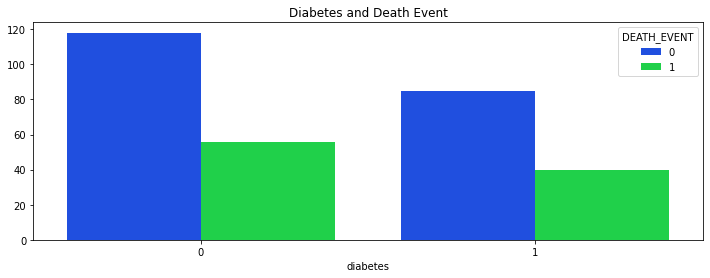

In [53]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='diabetes', hue='DEATH_EVENT')
plt.title('Diabetes and Death Event')
plt.ylabel(None)
plt.show()

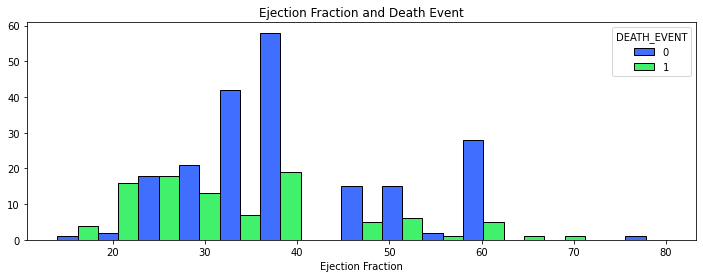

In [54]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='ejection_fraction', hue='DEATH_EVENT', multiple='dodge')
plt.title('Ejection Fraction and Death Event')
plt.xlabel('Ejection Fraction')
plt.ylabel(None)
plt.show()

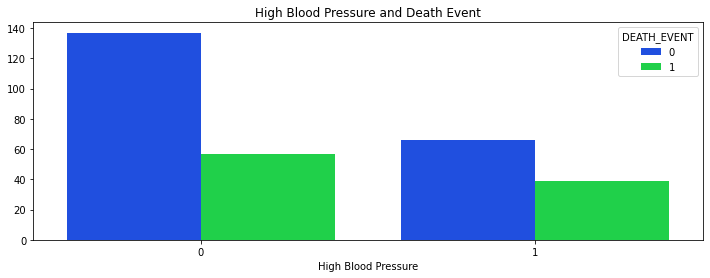

In [55]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='high_blood_pressure', hue='DEATH_EVENT')
plt.title('High Blood Pressure and Death Event')
plt.ylabel(None)
plt.xlabel('High Blood Pressure')
plt.show()

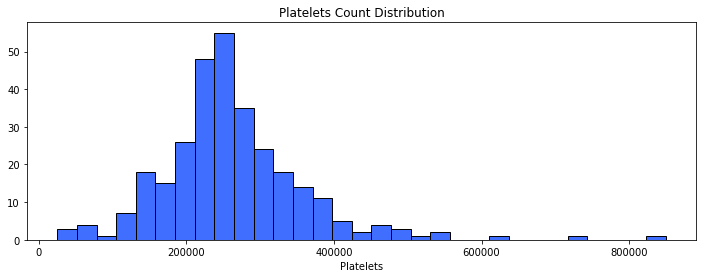

In [56]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='platelets')
plt.title('Platelets Count Distribution')
plt.xlabel('Platelets')
plt.ylabel(None)
plt.show()

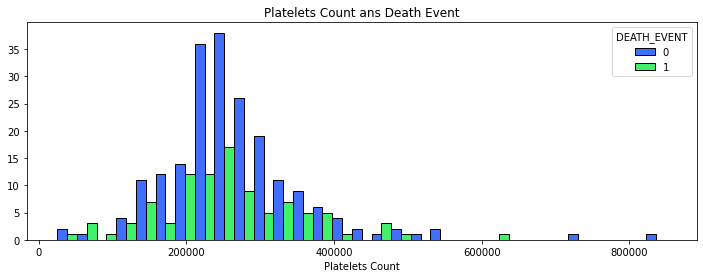

In [57]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='platelets', hue='DEATH_EVENT', multiple='dodge')
plt.title('Platelets Count ans Death Event')
plt.xlabel('Platelets Count')
plt.ylabel(None)
plt.show()

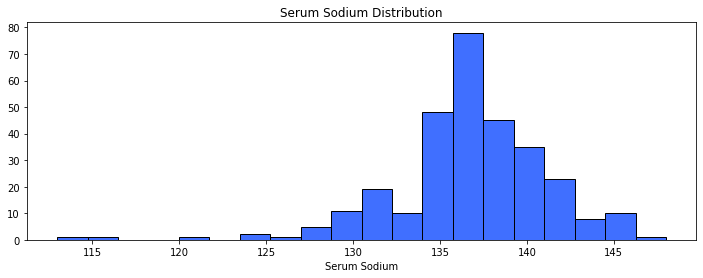

In [58]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='serum_sodium')
plt.title('Serum Sodium Distribution')
plt.ylabel(None)
plt.xlabel('Serum Sodium')
plt.show()

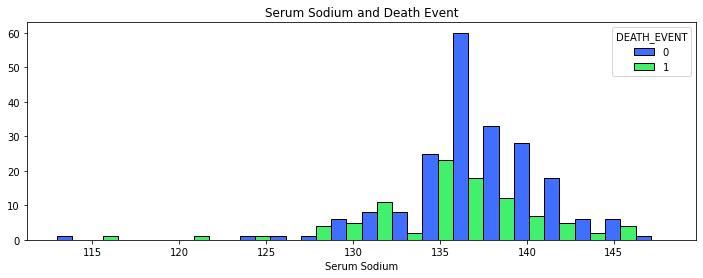

In [59]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='serum_sodium', hue='DEATH_EVENT', multiple='dodge')
plt.title('Serum Sodium and Death Event')
plt.xlabel('Serum Sodium')
plt.ylabel(None)
plt.show()

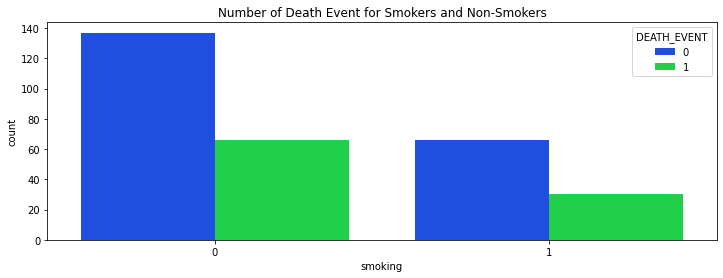

In [60]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='smoking', hue='DEATH_EVENT')
plt.title('Number of Death Event for Smokers and Non-Smokers')
plt.show()

In [61]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

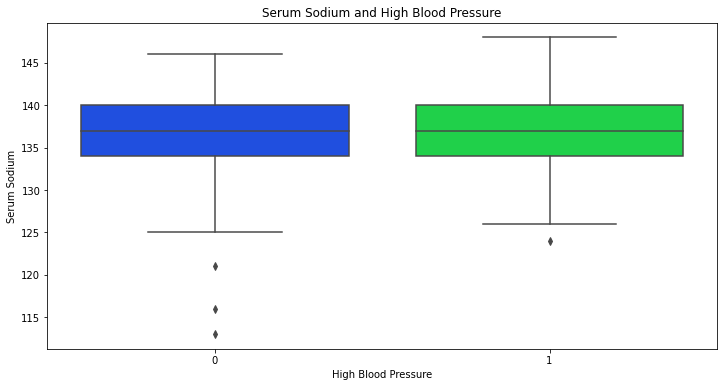

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='high_blood_pressure', y='serum_sodium')
plt.title("Serum Sodium and High Blood Pressure")
plt.xlabel('High Blood Pressure')
plt.ylabel("Serum Sodium")
plt.show()

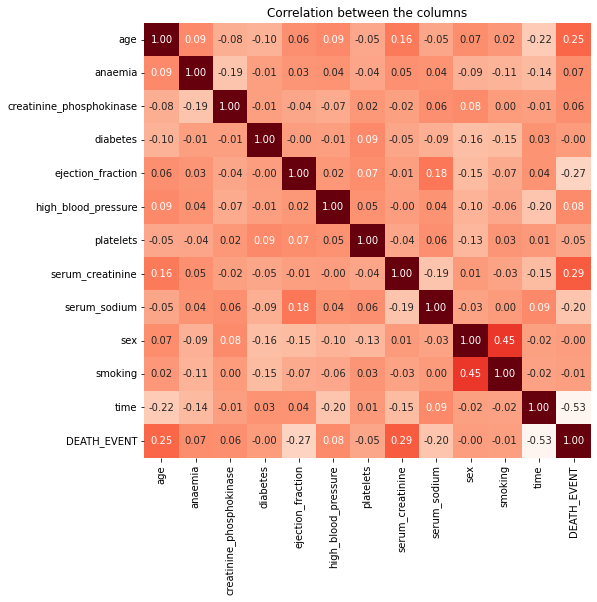

In [63]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cbar=False, cmap='Reds', fmt='.2f')
plt.title("Correlation between the columns")
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [65]:
y = df['DEATH_EVENT'].copy()
X = df.drop('DEATH_EVENT', axis=1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(239, 12) (239,)
(60, 12) (60,)


In [68]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f'the accuracy for the logistic regression is {acc}')

the accuracy for the logistic regression is 0.8


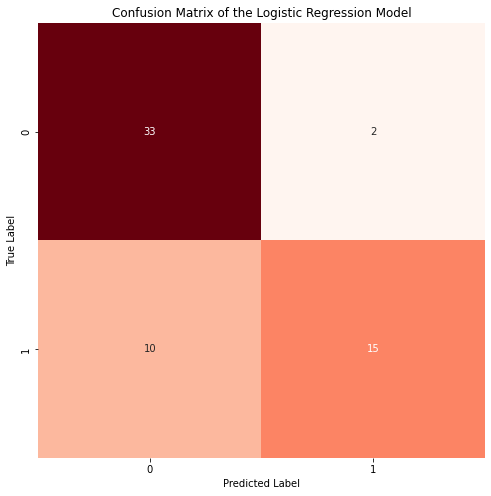

In [69]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cbar=None, cmap='Reds', fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Logistic Regression Model')
plt.show()

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
print("Logistic Regression Score")
print()
# 計算在訓練數據集上的精確度
train_precision = precision_score(y_test, y_pred)

# 計算在訓練數據集上的召回率
train_recall = recall_score(y_test, y_pred)

# 計算在訓練數據集上的 F1 分數
train_f1 = f1_score(y_test, y_pred)

# 計算在訓練數據集上的 ROC AUC 分數
train_roc_auc = roc_auc_score(y_test, y_pred)

print('Train precision: {:.2f}'.format(train_precision))
print('Train recall: {:.2f}'.format(train_recall))
print('Train F1: {:.2f}'.format(train_f1))
print('Train ROC AUC: {:.2f}'.format(train_roc_auc))

Logistic Regression Score

Train precision: 0.88
Train recall: 0.60
Train F1: 0.71
Train ROC AUC: 0.77


In [ ]:
# 繪製逻辑回归
plt.figure(figsize=(10, 10))
plot_boundary(model, X, y, cmap='RdYlBu')
plt.show()

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rf = RandomForestClassifier()
rfe = RFE(rf, 10) #篩選6個特徵
rfe.fit(X_train, y_train)

R_tree_y_pred = rfe.predict(X_test)
r_acc = accuracy_score(y_test, R_tree_y_pred)

print(f'the accuracy for the random forest is {r_acc}')

print(f"Number of selected features: {rfe.n_features_}\n\
Selected Features:", [feature for feature, rank in zip(X_train.columns.values, rfe.ranking_) if rank==1]) 

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


the accuracy for the random forest is 0.7333333333333333
Number of selected features: 10
Selected Features: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'time']


In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
print("Random Forest Score")
print()
# 計算在訓練數據集上的精確度
train_precision = precision_score(y_test, R_tree_y_pred)

# 計算在訓練數據集上的召回率
train_recall = recall_score(y_test, R_tree_y_pred)

# 計算在訓練數據集上的 F1 分數
train_f1 = f1_score(y_test, R_tree_y_pred)

# 計算在訓練數據集上的 ROC AUC 分數
train_roc_auc = roc_auc_score(y_test, R_tree_y_pred)

print('Train precision: {:.2f}'.format(train_precision))
print('Train recall: {:.2f}'.format(train_recall))
print('Train F1: {:.2f}'.format(train_f1))
print('Train ROC AUC: {:.2f}'.format(train_roc_auc))

Random Forest Score

Train precision: 0.80
Train recall: 0.48
Train F1: 0.60
Train ROC AUC: 0.70


In [73]:
from sklearn import tree
from sklearn.feature_selection import RFE
dt = tree.DecisionTreeClassifier()
dte = RFE(dt, 10) 
dte.fit(X_train, y_train)

dt_tree_y_pred = dte.predict(X_test)
dt_acc = accuracy_score(y_test, dt_tree_y_pred)
print(f'the accuracy for the decision tree is {dt_acc}')

print(f"Number of selected features: {dte.n_features_}\n\
Selected Features:", [feature for feature, rank in zip(X_train.columns.values, dte.ranking_) if rank==1]) 

the accuracy for the decision tree is 0.7
Number of selected features: 10
Selected Features: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
print("Decision Tree Score")
print()
# 計算在訓練數據集上的精確度
train_precision = precision_score(y_test, dt_tree_y_pred)

# 計算在訓練數據集上的召回率
train_recall = recall_score(y_test, dt_tree_y_pred)

# 計算在訓練數據集上的 F1 分數
train_f1 = f1_score(y_test, dt_tree_y_pred)

# 計算在訓練數據集上的 ROC AUC 分數
train_roc_auc = roc_auc_score(y_test, dt_tree_y_pred)

print('Train precision: {:.2f}'.format(train_precision))
print('Train recall: {:.2f}'.format(train_recall))
print('Train F1: {:.2f}'.format(train_f1))
print('Train ROC AUC: {:.2f}'.format(train_roc_auc))

Decision Tree Score

Train precision: 0.67
Train recall: 0.56
Train F1: 0.61
Train ROC AUC: 0.68
